Here, we show that the rk2/3 step integrator derived previously has 5th order accuracy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.optimize as opt

These are the rk coefficients

In [2]:
a_121, b_11, b_12, a_221, a_231, a_232, b_21, b_22, b_23 = [(0.4694036325154083+0.09263506914186012j),
 (0.45464140214409554-0.3685106302474753j),
 (-0.04943620139945573+0.3896680302353586j),
 (0.01095163857727765-0.004620620729965784j),
 (9.185593839648694+9.468015654867008j),
 (-9.121530507932487-9.046866541549512j),
 (-47.76105170474552-9.95275527416814j),
 (48.58668492572205+9.355312652006003j),
 (-0.2308384217211647+0.5762852221742528j)]

The integrator. Notice it has only 5 function evaluations

In [3]:
def rk5step(y0, f, dt):
    k11 = f(y0)
    k12 = f(y0+ a_121*dt*k11)
    y1 = y0 +b_11*dt*k11+b_12*dt*k12
    k21 = f(y1)
    k22 = f(y1 + a_221*dt*k21)
    k23 = f(y1 + a_231*dt*k21 + a_232*dt*k22)
    y2 = y1 +b_21*dt*k21+b_22*dt*k22+b_23*dt*k23
    return np.real(y2)

We now try our integrator on a lot of different scalar autonomous odes.

In [4]:
def f1(y):
    f1.counter  += 1
    return y
f1.counter = 0
error_lin = []
dt_lin = []
for N in [11, 51,  101,501, 1001]:
    end = 5
    y = np.zeros(N)
    y[0] = 1
    t = np.linspace(0, end, N)
    dt = end/(N-1)
    for i in range(1,N):
        y[i] = rk5step(y[i-1], f1, dt)  
    error = np.linalg.norm(y - np.exp(t), np.Inf)
    error_lin += [error]
    dt_lin += [dt]
error_lin

[0.02102129098480532,
 9.460583214604412e-06,
 3.0856827493153105e-07,
 1.0271605788148008e-10,
 3.950617610826157e-12]

In [5]:
np.linalg.norm(y - np.exp(t), np.Inf)

3.950617610826157e-12

In [6]:
def f1(y):
    return y**2
error_sq = []
dt_sq = []
for N in [11, 51,  101,501, 1001]:
    end = 0.8
    y = np.zeros(N)
    y[0] = 1
    t = np.linspace(0, end, N)
    dt = end/(N-1)
    for i in range(1,N):
        y[i] = rk5step(y[i-1], f1, dt)
    error = np.linalg.norm(y - 1/(1-t), np.Inf)
    error_sq += [error]
    dt_sq += [dt] 
error_sq

[0.004697696656566386,
 3.009314835544785e-06,
 1.0159404162379815e-07,
 3.441158469286165e-11,
 9.414691248821327e-13]

In [7]:
np.linalg.norm(y - 1/(1-t), np.Inf)#/2**5

9.414691248821327e-13

In [8]:
def f1(y):
    return np.sin(y)
error_sin = []
dt_sin = []
for N in [11, 51,  101,501, 1001]:
    end = 10
    y = np.zeros(N)
    y[0] = 1
    t = np.linspace(0, end, N)
    dt = end/(N-1)
    true = 2*np.arctan(np.exp(t)*np.tan(0.5))
    for i in range(1,N):
        y[i] = rk5step(y[i-1], f1, dt)
    error = np.linalg.norm(y - true, np.Inf)
    error_sin += [error]
    dt_sin += [dt]
error_sin

[0.006458612923314178,
 1.1045198036185866e-06,
 3.2901904756243994e-08,
 1.014699435586408e-11,
 3.148592497836944e-13]

In [9]:
def f1(y):
    return np.exp(y)

error_exp = []
dt_exp = []
for N in [11, 51,  101,251, 501]:
    end = 0.8
    y = np.zeros(N)
    y[0] = 0
    t = np.linspace(0, end, N)
    dt = end/(N-1)
    true = -np.log(1-t)
    for i in range(1,N):
        y[i] = rk5step(y[i-1], f1, dt)
    error = np.linalg.norm(y - true, np.Inf)
    error_exp += [error]
    dt_exp += [dt]


We plot the errors on a convergence plot to highlight 5th order accuracy

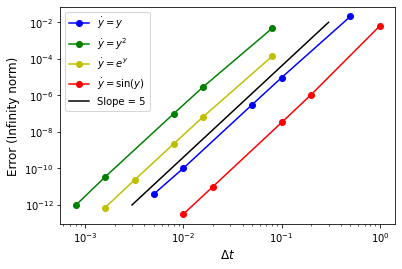

In [11]:
ax = plt.subplot(111)
ax.loglog(dt_lin, error_lin, 'b-o', label = r'$\dot{y} = y$')
ax.loglog(dt_sq, error_sq, 'g-o',label = r'$\dot{y} = y^2$')
ax.loglog(dt_exp, error_exp, 'y-o',label = r'$\dot{y} = e^y$')
ax.loglog(dt_sin, error_sin, 'r-o',label = r'$\dot{y} = \sin(y)$')
ax.loglog([0.3, 3*10**(-3)],[10**(-2), 10**(-12)], 'k',label = 'Slope = 5')
ax.set_xlabel(r'$\Delta t$' , fontsize = 12)
ax.set_ylabel('Error (Infinity norm)', fontsize = 12)
ax.legend()
plt.savefig('order_barrier.pdf')

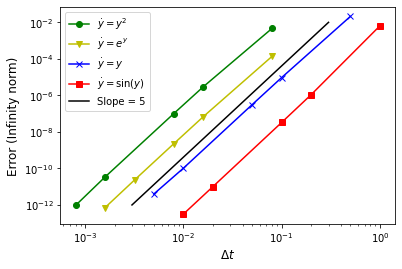

In [12]:
ax = plt.subplot(111)
ax.loglog(dt_sq, error_sq, 'g-o',label = r'$\dot{y} = y^2$')
ax.loglog(dt_exp, error_exp, 'y-v',label = r'$\dot{y} = e^y$')
ax.loglog(dt_lin, error_lin, 'b-x', label = r'$\dot{y} = y$')


ax.loglog(dt_sin, error_sin, 'r-s',label = r'$\dot{y} = \sin(y)$')
ax.loglog([0.3, 3*10**(-3)],[10**(-2), 10**(-12)], 'k',label = 'Slope = 5')
ax.set_xlabel(r'$\Delta t$' , fontsize = 12)
ax.set_ylabel('Error (Infinity norm)', fontsize = 12)
ax.legend()
plt.savefig('order_barrier.pdf')